# K-Means Clustering Algorithm

A basic implementation of the K-means algorithm to a cluster randomly generated data set. 


In [159]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import math
import random

In [160]:
def compute_euclidean_distance(start, end, m):
    sum = 0
    for i in range(0, m):
        sum += math.pow(start[i]-end[i], 2)
    return math.sqrt(sum)
    # return math.sqrt(pow(start[0]-end[0], 2) + pow(start[1]-end[1], 2))

def initialise_centroids(X, K=4):
    centroids = [X[random.randint(0, len(X))] for i in range(K)]
    return centroids


In [161]:
def k_means(X, centroids, m, K=4):
    assigned_cluster = []
    for idx, xi in enumerate(X):
        distances = [compute_euclidean_distance(xi, centroids[i], m) for i in range(K)]
        index = distances.index(min(distances))
        assigned_cluster.append(index)


    converged = False
    while not converged:
        converged = True
        for idx, xi in enumerate(X):
            distances = [compute_euclidean_distance(xi, centroids[i], m) for i in range(K)]
            index = distances.index(min(distances))
            if assigned_cluster[idx] != index:
                converged = False
            assigned_cluster[idx] = index
    return assigned_cluster


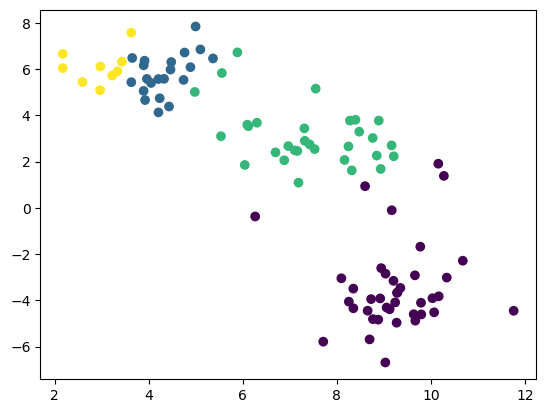

In [162]:
K = 4 # number of clusters 
m = 2 # number of attributes
X, clusters = make_blobs( n_samples=100, n_features=m, cluster_std=1.0 ) # data set
centres = initialise_centroids(X, K)
assigned_cluster = k_means(X, centres, m, K)
plt.scatter(X[:, 0], X[:, 1], c=assigned_cluster)
plt.show()
